# Curso de Optimización I (DEMAT/CIMAT)
# Tarea 1

| Descripción:                         | Fechas                  |
|--------------------------------------|-------------------------|
| Fecha de publicación del documento:  | **Enero  25, 2024**    |
| Fecha límite de entrega de la tarea: | **Febrero 4, 2024**    |

## Indicaciones

Puede escribir el código de los algoritmos que se piden en una
celda de este notebook o si lo prefiere, escribir las funciones
en un archivo `.py` independiente e importar la funciones para
usarlas en este notebook. Lo importante es que en el notebook
aparezcan los resultados de la pruebas realizadas y que:

- Si se requieren otros archivos para poder reproducir los resultados,
  para mandar la tarea cree un archivo ZIP en el que incluya
  el notebook y los archivos adicionales.
- Si todos los códigos para que se requieren para reproducir los
  resultados están en el notebook, no hace falta comprimir el notebook
  y puede anexar este archivo en la tarea del Classroom.
- Exportar el notebook a un archivo PDF y anexarlo en la tarea del
  Classroom como un archivo independiente.
  **No incluya el PDF dentro del ZIP**, porque la idea que lo pueda accesar
  directamente para poner anotaciones y la calificación de cada ejercicio.

En la descripción de los ejercicios se nombran algunas variables
para el algoritmo, pero sólo es para facilitar la descripción.
En la implementación pueden nombrar sus variables como gusten.

En los algoritmos se describen las entradas de las
funciones. La intención es que tomen en cuenta lo que requiere
el algoritmo y que tiene que haber parámetros que permitan
controlar el comportamiento del algoritmo,
evitando que dejen fijo un valor y que no se puede modificar
para hacer diferentes pruebas. Si quieren dar esta información
usando un tipo de dato que contenga todos los valores o
usar variables por separado, etc., lo pueden hacer y no usen
variables globales si no es necesario.

Lo mismo para los valores que devuelve una función.
Pueden codificar como gusten la manera en que regresa los cálculos.
El punto es que podamos tener acceso a los resultados para poder usarlos,
y por eso no es conveniente que la función sólo imprima los valores
sin devolverlos.

Para los ejercicios teóricos puede escribir en la celda la solución, o
si escribio la solución en una hoja, puede insertar una(s) foto(s) en la que
se vea clara la solución. Si le es más facíl insertar la imagen en un procesador
de texto como Word, lo puede utilizar y exportar el documento a PDF y subir
el archivo. No lo compacte para que se pueda escribir anotaciones en el PDF.

$$
\newcommand{\x}{\mathbf{x}}
\newcommand{\ci}{\left(}
\newcommand{\cd}{\right)}
\newcommand{\p}{\mathbf{p}}
\newcommand{\e}{\mathbf{e}}
$$

----

## Ejercicio 1 (3.5 puntos)

1. Programar el método de la sección dorada descrito en la diapositiva 9 de la Clase 3.
   La función que implementa el método recibe como argumentos la función que se va
   a optimizar, los límites $x_l$ y $x_u$ del intervalo de búsqueda, la tolerancia
   $\tau>0$, y el número máximo de iteraciones $N$.
   
   La función debe devolver el punto $x_k, f(x_k)$, los extremos del último intervalo de búsqueda
   $[x_l, x_u]$, el número de iteraciones $k$ realizadas y la variable booleana $bres$
   que indica si el algoritmo terminó porque se cumplió el criterio de paso o no.
   
2. Probar el método con las funciones que se describen en las siguientes
   celdas.
- Use el intervalo que se especifica en cada caso y $N=50$.
- Use como tolerancie $\tau = \epsilon_m^{1/3}$, donde $\epsilon_m$ es el épsilon de la máquina.
- Imprima $k, x_k, f_k, x_u-x_l$ y $bres$.

### Solución:

In [1]:
# Código de la función
import numpy as np

def golden_section_search(f, xl, xu, t: float, N: int):
    phi = (np.sqrt(5) - 1) / 2
    x = 0
    for k in range(N):
        b = phi*(xu-xl)
        x1, x3 = xu - b, xl + b
        if f(x1) < f(x3):
            xu, x = x3, x1
        if f(x1)> f(x3):
            xl, x = x1, x3
        if abs(xu-xl) < t:
            return x, xl, xu, k, True
    return x, xl, xu, N, False

def golden_section_search_test(f, xl, xu, t: float, N: int):
    xx = np.linspace(xl, xu, 100)
    plt.plot(xx, f(xx))

    xk, xl, xu, k, bres = golden_section_search(f, xl, xu, t, N)
    fk = f(xk)
    plt.scatter(xk, fk, color='red')

    print(f"k = {k} xk = {xk}, fk = {fk}, xu - xl = {xu-xl}, bres = {bres}")


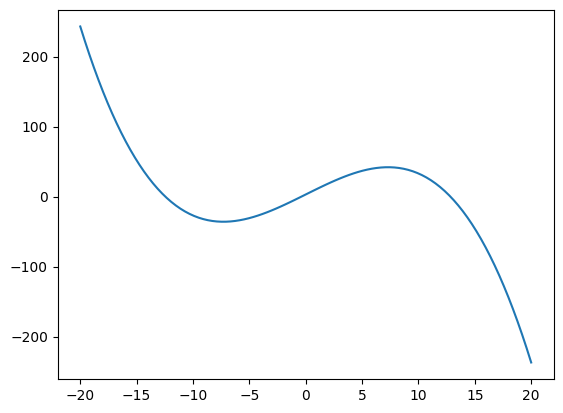

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Función objetivo 1
def fnc1(x):
    return -0.05*x**3 + 8*x + 3

xl = -20
xu =  20
xx = np.linspace(xl, xu, 100)
plt.plot(xx, fnc1(xx))

In [3]:
# config parametros
tol = np.finfo(float).eps**(1/3)
N = 50

k = 32 xk = -7.302967212715323, fk = -35.94915964481176, xu - xl = 5.075371808160867e-06, bres = True


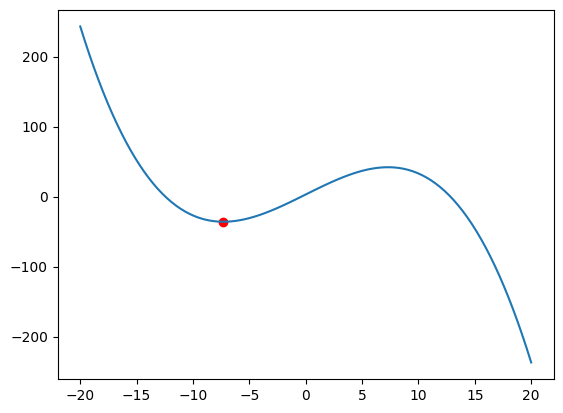

In [4]:
# Prueba del algoritmo
xl = -20
xu =  20
golden_section_search_test(fnc1, xl, xu, tol, N)

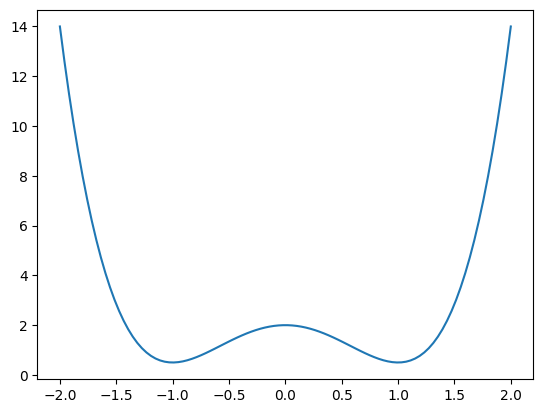

In [5]:
# Función objetivo 2
def fnc2(x):
    return 1.5*x**4 - 3*x**2 + 2

xl = -2
xu =  2
xx = np.linspace(xl, xu, 100)
plt.plot(xx, fnc2(xx))

k = 50 xk = 0, fk = 2.0, xu - xl = 4, bres = False


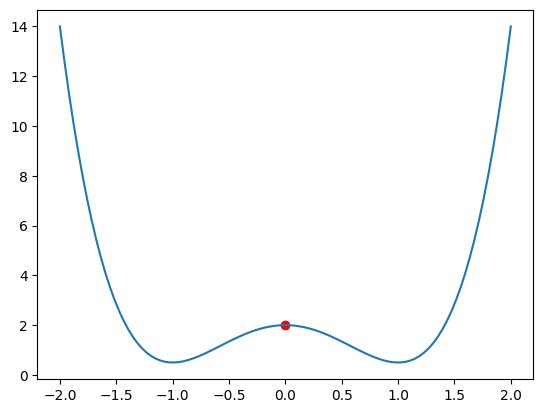

In [6]:
# Prueba del algoritmo
xl = -2
xu =  2
golden_section_search_test(fnc2, xl, xu, tol, N)



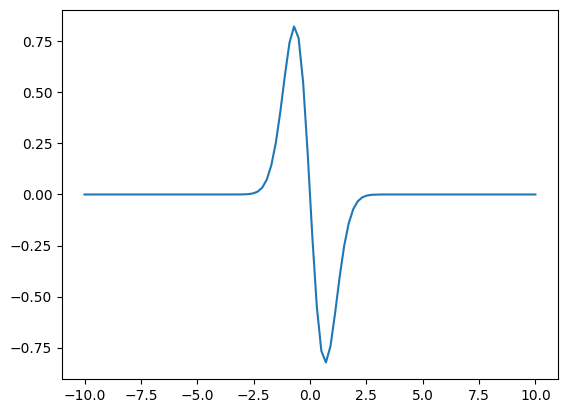

In [7]:
# Función objetivo 3
def fnc3(x):
    return -(x + np.sin(x))*np.exp(-x**2)

xl = -10
xu =  10
xx = np.linspace(xl, xu, 100)
plt.plot(xx, fnc3(xx))

k = 31 xk = 0.6795782938545382, fk = -0.8242393984758376, xu - xl = 4.106062046371761e-06, bres = True


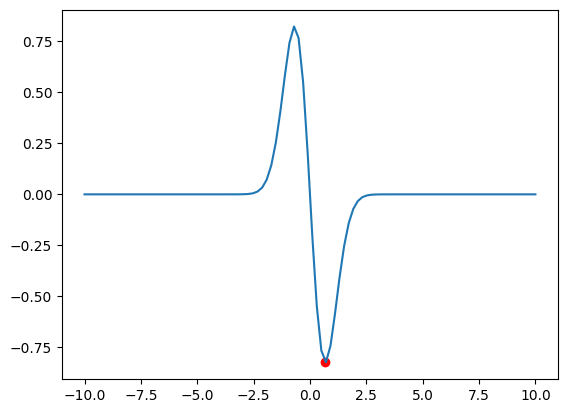

In [8]:
# Prueba del algoritmo

xl = -10
xu =  10
golden_section_search_test(fnc3, xl, xu, tol, N)



_

```







```

---

## Ejercicio 2 (3 puntos)

La función de Griewangk en $\mathbb{R}^2$ se define como

$$ f(\mathbf{x}) = f(x_1,x_2) = \frac{x^2_1 + x^2_2}{4000} - \cos(x_1)\cos\left(\frac{x_2}{\sqrt{2}}\right) + 1 $$

Dado el punto $\mathbf{x}_k$ y la dirección $\mathbf{d}_k$, definimos la función
$g(t; \mathbf{x}_k, \mathbf{d}_k) = f(\mathbf{x}_k + t\mathbf{d}_k)$.

1. Programe las funciones  $f(\mathbf{x})$ y $g(t; \mathbf{x}_k, \mathbf{d}_k)$.
2. Calcule de manera analítica el gradiente de $f(\mathbf{x})$ y programe la función correspondiente.
3. Sean $\mathbf{x}_0 = (3,0.5)$, $\mathbf{d}_0 = \mathbf{p}/\|\mathbf{p}\|$, donde
   $\mathbf{p} = (2,1)$, y $\mathbf{g}_0 = \nabla f(\mathbf{x}_0)/\|\nabla f(\mathbf{x}_0)\|$.
   Calcule el valor de la derivada direccional de $f$ en $\mathbf{x}_0$ en la dirección
   $\mathbf{d}_0$ y en la dirección $-\mathbf{g}_0$. Imprima estos valores.
4. Genere una gráfica que muestre  la gráfica de $g(t; \mathbf{x}_0, \mathbf{d}_0)$ y
   $g(t; \mathbf{x}_0, -\mathbf{g}_0)$ para $t \in [0,2]$.
5. Aplique el método de la sección dorada para minimizar la función $g(t; \mathbf{x}_0, -\mathbf{g}_0)$
   en el intervalo $[0, 2]$. Si $t_0$ es el minimizador y $\mathbf{x}_1 = \mathbf{x}_0 - t_0\mathbf{g}_0$,
   imprima $\mathbf{x}_0$, $f(\mathbf{x}_0)$, $t_0$, $\mathbf{x}_1$, $f(\mathbf{x}_1)$.
6. Repita los puntos 4 y 5 usando el intervalo $[0,8]$.

### Solución.

In [9]:
import numpy as np

# @np.vectorize
def griewangk(x ):
    x1, x2 = x[0], x[1]
    res = (x1**2 + x2**2)/4000
    res -= np.cos(x1)*np.cos(x2/np.sqrt(2))
    return res + 1

# @np.vectorize
def g(t, xk, dk):
    return griewangk(xk + t*dk)



2. Podemos ver que
$$
\nabla f(\x) = \begin{bmatrix}
\frac{\partial f(\x)}{\partial x_1}\\
\frac{\partial f(\x)}{\partial x_2}
\end{bmatrix}  = \begin{bmatrix}
\frac{x_1}{2000}+ \sin(x_1)\cos\left(\frac{x_2}{\sqrt{2}}\right) \\
\frac{x_2}{2000}+ \frac{1}{\sqrt{2}}\cos(x_1)\sin\left(\frac{x_2}{\sqrt{2}}\right)
\end{bmatrix},
$$
por lo cual

In [10]:
def grad_griewangk(x:np.ndarray):
    x1, x2 = x[0], x[1]
    y1 = x1/2000 + np.sin(x1)*np.cos(x2/np.sqrt(2))
    y2 = x2/2000 + np.sqrt(2)/2*np.cos(x1)*np.sin(x2/np.sqrt(2))
    return np.array([y1, y2])


In [11]:
x0 = np.array([3, 0.5])
p = np.array([2, 1])
d0 = p/np.linalg.norm(p)
gf0 = grad_griewangk(x0)
g0 = gf0/np.linalg.norm(gf0)
print(f"Derivada direccional de f en x_0 en la dirección d0: {gf0.T*d0}")
print(f"Derivada direccional de f en x_0 en la dirección -g0: {-gf0.T*g0}")


Derivada direccional de f en x_0 en la dirección d0: [ 0.1197562  -0.10828116]
Derivada direccional de f en x_0 en la dirección -g0: [-0.06479338 -0.21188511]


In [12]:
import matplotlib.pyplot as plt

def plot_g(x0, d0, I):
    t = np.linspace(I[0], I[1], 100)
    # line = np.array([x0 + a*d0 for a in t])
    # print(line, x0 + t*d0)
    # gt = griewangk(line)
    gt = np.array([g(a, x0, d0) for a in t])
    plt.plot(t, gt)

Graficas de $g(t; \x_0, \mathbf{d}_0)$ y $g(t; x_0,-\mathbf{g}_0)$, $t \in [0, 2]$

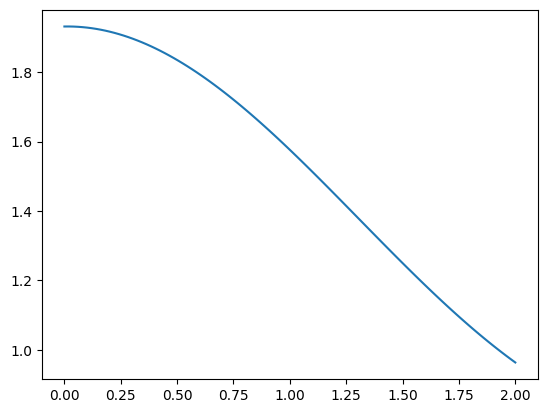

In [13]:
plot_g(x0, d0, [0, 2])

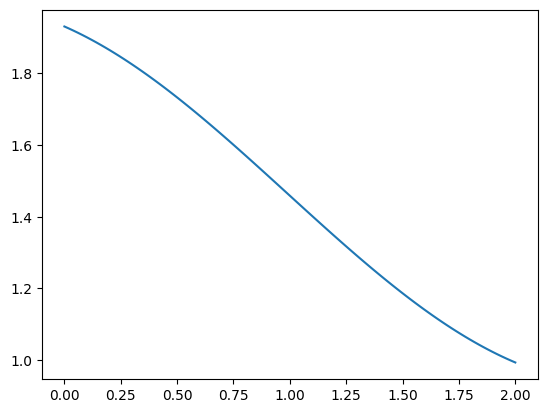

In [14]:
plot_g(x0, -g0, [0, 2])

x0 = [3.  0.5], f(x0) = 1.9310723123875322, x1 = [2.03215236 2.25021704], f(x1)=0.9932410001528889
k = 26 xk = 1.9999971856632055, fk = 0.9932410001528889, xu - xl = 4.553692589448488e-06, bres = True


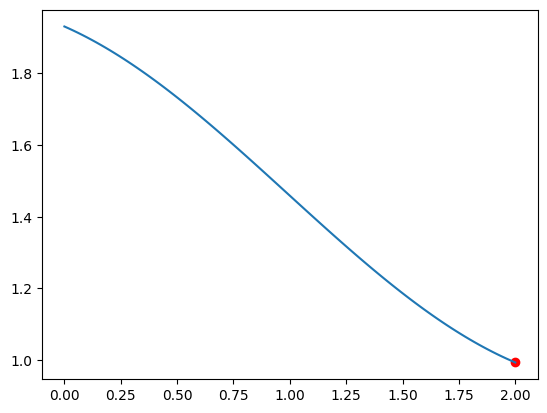

In [15]:
t0, *_ = golden_section_search(np.vectorize(lambda t: g(t, x0, -g0)), 0, 2, tol, N)
x1 = x0-t0*g0
print(f"x0 = {x0}, f(x0) = {griewangk(x0)}, x1 = {x1}, f(x1)={griewangk(x1)}")
golden_section_search_test(np.vectorize(lambda t: g(t, x0, -g0)), 0, 2, tol, N)

Graficas de $g(t; \x_0, \mathbf{d}_0)$ y $g(t; x_0,-\mathbf{g}_0)$, $t \in [0, 8]$

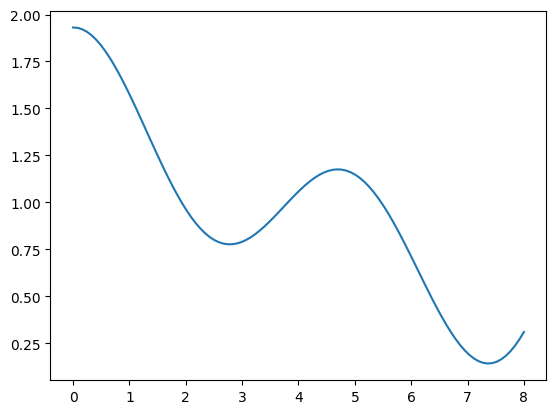

In [16]:
plot_g(x0, d0, [0, 8])

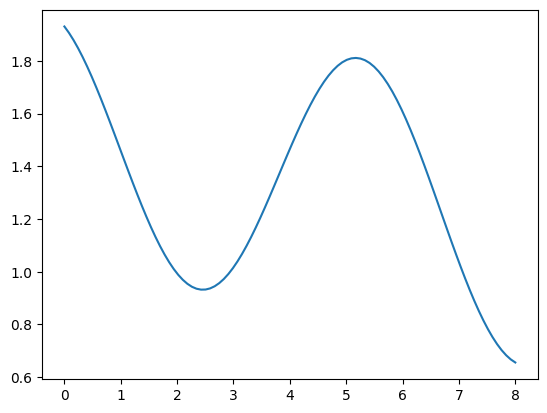

In [17]:
plot_g(x0, -g0, [0, 8])

x0 = [3.  0.5], f(x0) = 1.9310723123875322, x1 = [1.81143011 2.64936234], f(x1)=0.9315587863963392
k = 29 xk = 2.4561060376666815, fk = 0.9315587863963392, xu - xl = 4.299923999084854e-06, bres = True


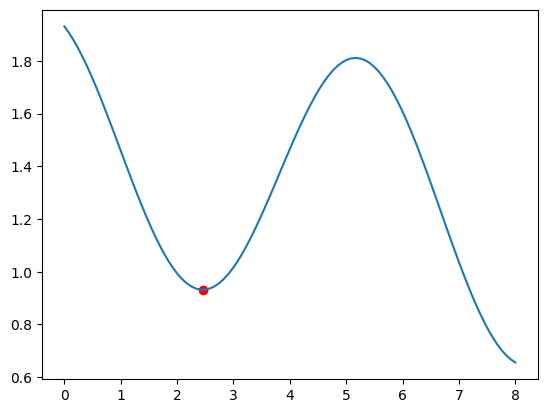

In [18]:
t0, *_ = golden_section_search(np.vectorize(lambda t: g(t, x0, -g0)), 0, 8, tol, N)
x1 = x0-t0*g0
print(f"x0 = {x0}, f(x0) = {griewangk(x0)}, x1 = {x1}, f(x1)={griewangk(x1)}")
golden_section_search_test(np.vectorize(lambda t: g(t, x0, -g0)), 0, 8, tol, N)

En este caso podemos ver que $griewank$ no se minimiza en la dirección del gradiente.

_

```







```

---

## Ejercicio 3 (1.5 puntos)

Sean $\mathbf{a}, \mathbf{b} \in \mathbb{R}^n$. Calcule el gradiente y la Hessiana de la
función  $f(\mathbf{x}) = (\mathbf{a}^\top \mathbf{x})(\mathbf{b}^\top \mathbf{x})$.

### Solución:

Primero calculemos el **gradiente**, para ello por lo visto en clase sabemos que
$$
 \nabla (\mathbf{c}^\top \x) = \mathbf{c},
$$
además tanto $(\mathbf{a}^\top\x)$ como $(\mathbf{b}^\top \x)$ son diferenciables y por tanto su producto,
por lo cual tenemos que
$$
\begin{align}
\nabla f(\x) &= \nabla \ci(\mathbf{a}^\top \mathbf{x})(\mathbf{b}^\top \mathbf{x}) \cd\\
&= [\nabla(\mathbf{a}^\top\x)](\mathbf{b}^\top\x) +( \mathbf{a}^\top\x) [\nabla(\mathbf{b}^\top\x)] \\
&= (\mathbf{b}^\top\x)\mathbf{a} + ( \mathbf{a}^\top\x)\mathbf{b}.
\end{align}
$$
<!-- De lo anterior obtenemos que
$$
\begin{align}
    \nabla f(\x) &= \begin{pmatrix}
        (\mathbf{b}^\top\x) a_1 + ( \mathbf{a}^\top\x)b_1\\
                \vdots\\
        (\mathbf{b}^\top\x) a_n + ( \mathbf{a}^\top\x)b_n
    \end{pmatrix} \\
    &= (\mathbf{b}^\top\x)\begin{pmatrix}
        a_1\\
        \vdots\\
        a_n
    \end{pmatrix} + ( \mathbf{a}^\top\x)\begin{pmatrix}
        b_1\\
        \vdots\\
        b_n
    \end{pmatrix} \\
    &= (\mathbf{b}^\top\x)\mathbf{a} + ( \mathbf{a}^\top\x)\mathbf{b}
\end{align}
$$ -->

Ahora calculemos **Hessiana**, para ello notemos que dado $i$
$$
\begin{align}
\frac{\partial f}{∂ x_i} &= \frac{\partial }{∂ x_i}[(\mathbf{a}^\top \mathbf{x})(\mathbf{b}^\top \mathbf{x})] \\
&= (\mathbf{a}^\top\x) \frac{\partial }{∂ x_i}(\mathbf{b}^\top \x) + (\mathbf{b}^\top \x) \frac{\partial }{∂ x_i}(\mathbf{a}^\top\x)\\
&= (\mathbf{a}^\top\x) b_i + (\mathbf{b}^\top \x) a_i.
\end{align}
$$ (*De aqui pudimos obtener el gradiente*)
De lo anterior tenemos que dado $j$
$$
\begin{align}
\frac{\partial f}{∂ x_i∂ x_j} &= \frac{\partial }{∂ x_j}[(\mathbf{a}^\top\x) b_i + (\mathbf{b}^\top \x) a_i] = b_ia_j + a_ib_j,
\end{align}
$$
por lo tanto
$$\begin{align}
\nabla^2 f(\x) = \begin{bmatrix}
2a_1b_1 & b_1a_2 + a_1b_2 & ⋯ & b_1a_n + a_1b_n \\
\vdots & \vdots &  \ddots & \vdots\\
b_na_1 + a_nb_1& b_na_2 + a_nb_2&\cdots &2a_nb_n
\end{bmatrix}
\end{align}
$$


_

```







```

---

## Ejercicio 4 (2 puntos)

Tenemos los valores de la derivada direccional $\frac{\partial f}{\partial \mathbf{p}_i}$
de $f$ en el punto $\mathbf{x}_0$ para tres direcciones $\mathbf{p}_i$:

$$ \frac{\partial f}{\partial \mathbf{p}_1}(\mathbf{x}_0) = \frac{3}{\sqrt{2}} \quad \text{para} \quad
\mathbf{p}_1 = \left(0,\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}} \right)^\top,$$
$$ \frac{\partial f}{\partial \mathbf{p}_2}(\mathbf{x}_0) = \frac{1}{\sqrt{2}} \quad \text{para} \quad
\mathbf{p}_2 = \left(\frac{1}{\sqrt{2}},0,\frac{1}{\sqrt{2}} \right)^\top,$$
$$ \frac{\partial f}{\partial \mathbf{p}_3}(\mathbf{x}_0) = -\frac{1}{\sqrt{2}} \quad \text{para} \quad
\mathbf{p}_3 = \left(\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}},0 \right)^\top.$$

A partir de esto, calcule el vector gradiente $\nabla f(\mathbf{x}_0)$.

### Solución:

Podemos notar que $\p_1, \p_2, \p_3$ son linealmente independientes por lo tanto
son una base en $\mathbb{R}^3$.

Notemos que  
$$ \nabla f(\x_0) = \nabla f(\x_0)^\top\e_1 + \nabla f(\x_0)^\top\e_2 + \nabla f(\x_0)^\top\e_3, $$
entonce debemos expresar $\e_1, \e_2, \e_3$ en terminos de la base $\{\p_1, \p_2, \p_3\}$.

Para ello notemos que
$$
\e_1 = -\frac{\sqrt{2}}{2}\p_1 +\frac{\sqrt{2}}{2}\p_2 + \frac{\sqrt{2}}{2}\p_3
$$
por lo cual
$$
 \begin{aligned}
 \nabla f(\x_0)^\top\e_1 &= -\frac{\sqrt{2}}{2}\nabla f(\x_0)^\top\p_1 +\frac{\sqrt{2}}{2}\nabla f(\x_0)^\top\p_2 + \frac{\sqrt{2}}{2}\nabla f(\x_0)^\top\p_3\\
  &= -\frac{\sqrt{2}}{2}\frac{\partial f}{\partial \p_1}(\x_0)+\frac{\sqrt{2}}{2}\frac{\partial f}{\partial \p_2}(\x_0) + \frac{\sqrt{2}}{2}\frac{\partial f}{\partial \p_3}(\x_0) \\
  &= -\frac{3}{2}.
 \end{aligned}
$$
De manera similar obtenemos que
$$
\begin{aligned}
\nabla f(\x_0)^\top\e_2 &= \frac{1}{2}\\
\nabla f(\x_0)^\top\e_3 &= \frac{5}{2}
\end{aligned}
$$
Por lo anterior vemos que
$$
\nabla f(\x_0) = \begin{bmatrix}
-\frac{3}{2}\\
\frac{1}{2}\\
\frac{5}{2}  
\end{bmatrix}
$$




_

```







```

---